In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

small=True


In [3]:
if small==True:
    crimedf = pd.read_csv('C:\Users\ccupp.PETROWEB\Documents\GitHub\PythonCrimePractice\PythonCrimePractice\CrimeFirst1000.csv')
else:
    crimedf = pd.read_csv('C:\Users\ccupp.PETROWEB\Documents\GitHub\PythonCrimePractice\PythonCrimePractice\CrimeAll.csv')
    #crimedf = pd.read_csv('C:\Users\ccupp.PETROWEB\Documents\GitHub\PythonCrimePractice\CrimeAll.csv', nrows=100000)

C:\Users\ccupp.PETROWEB\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,7,8,9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(crimedf.FIRST_OCCURRENCE_DATE.tail())

453272    NaN
453273    NaN
453274    NaN
453275    NaN
453276    NaN
Name: FIRST_OCCURRENCE_DATE, dtype: object


In [5]:
#print(crimedf.info())
crimedfNoAccidents = crimedf[crimedf['IS_TRAFFIC']==0]
#print(crimedf.info())

In [6]:

#sns.countplot(x='NEIGHBORHOOD_ID', data=crimedf)
#plt.xticks(rotation=55)
#plt.show()

if small==True:
    minCount=20
else:
    minCount=8000
    
valcounts=crimedfNoAccidents['NEIGHBORHOOD_ID'].value_counts()
#print(valcounts)
high_counts= valcounts>minCount
#high_counts= valcounts>2000
#print (high_counts.describe())

high_counts_list = high_counts[high_counts==True].index.tolist()
#print(high_counts_list)
print(high_counts_list)

only_high_counts= crimedfNoAccidents[crimedfNoAccidents['NEIGHBORHOOD_ID'].isin(high_counts_list)]
print(only_high_counts.head())




#highcountdf =crimedf['NEIGHBORHOOD_ID']== high_counts

#print(highcountdf.head())
#print(high_counts)
#neighborcounts['counts']=neighborcounts[neighborcounts.counts>20]
#neighborcounts=neighborcounts.loc[neighborcounts]
#print(neighborcounts.head())

['stapleton', 'montbello', 'five-points', 'lincoln-park', 'cbd', 'west-colfax', 'civic-center', 'gateway-green-valley-ranch']
     INCIDENT_ID    OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
0   2.016377e+09  2.016380e+15        5213.0                     0.0   
1   2.018600e+10  2.018600e+16        2399.0                     0.0   
17  2.018692e+08  2.018690e+14        5707.0                     0.0   
20  2.018712e+08  2.018710e+14        5499.0                     0.0   
28  2.017295e+09  2.017290e+15        2404.0                     0.0   

                 OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID FIRST_OCCURRENCE_DATE  \
0   weapon-unlawful-discharge-of    all-other-crimes       6/15/2016 23:31   
1                    theft-other             larceny      10/11/2017 12:30   
17          criminal-trespassing    all-other-crimes       1/29/2018 14:50   
20                    traf-other    all-other-crimes       1/30/2018 11:27   
28        theft-of-motor-vehicle          auto-thef

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

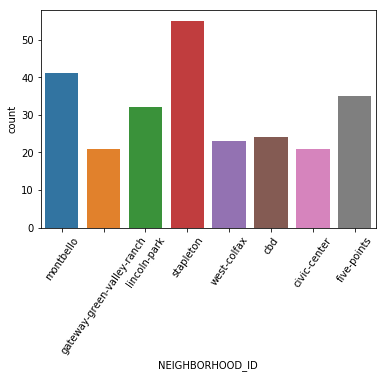

In [7]:
sns.countplot(x='NEIGHBORHOOD_ID', data=only_high_counts)
plt.xticks(rotation=55)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

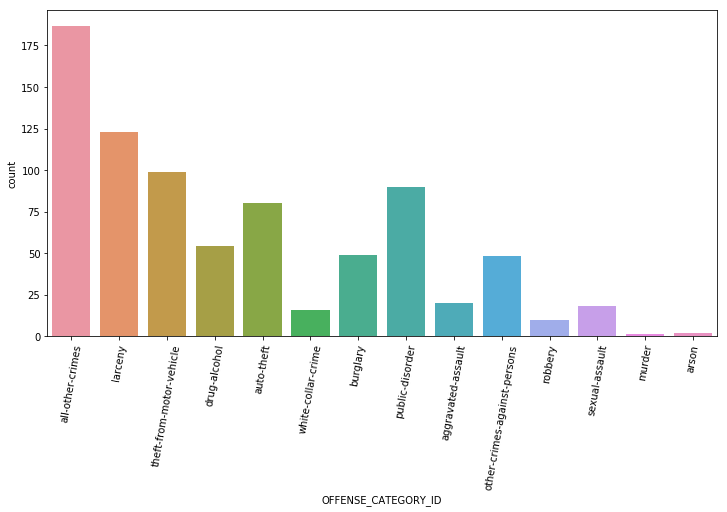

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='OFFENSE_CATEGORY_ID', data=crimedfNoAccidents)

plt.xticks(rotation=80)

C:\Users\ccupp.PETROWEB\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ccupp.PETROWEB\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


797.0
Tuesday      0.249686
Monday       0.244668
Wednesday    0.156838
Sunday       0.106650
Thursday     0.090339
Name: DayOfWeek, dtype: float64
count    7.000000
mean     0.142857
std      0.076384
min      0.075282
25%      0.083438
50%      0.106650
75%      0.200753
max      0.249686
Name: DayOfWeek, dtype: float64


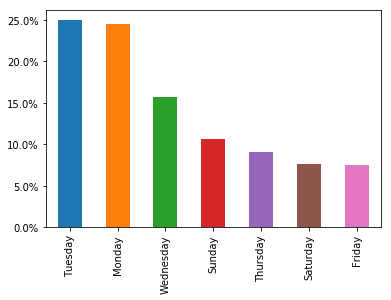

In [10]:
#print(crimedfNoAccidents['FIRST_OCCURRENCE_DATE'].describe())
crimedfNoAccidents['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(crimedfNoAccidents['FIRST_OCCURRENCE_DATE'])

#print(crimedfNoAccidents['FIRST_OCCURRENCE_DATE'].describe())
crimedfNoAccidents['DayOfWeek'] = crimedfNoAccidents['FIRST_OCCURRENCE_DATE'].dt.weekday_name
#print(crimedfNoAccidents.head())


dayofweekvalcounts=crimedfNoAccidents['DayOfWeek'].value_counts().astype(float)
dayofweekvalcountsTotal = dayofweekvalcounts.sum()
print(dayofweekvalcountsTotal)
dayofweekvalcountsPercent   = dayofweekvalcounts.apply(lambda x : x / dayofweekvalcountsTotal )
print(dayofweekvalcountsPercent.head())
ax = dayofweekvalcountsPercent.plot(kind='bar')
print(dayofweekvalcountsPercent.describe())

type(ax)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
plt.show()
